<a href="https://www.kaggle.com/code/ardaorcun/bigram-language-model-from-scratch?scriptVersionId=161149656" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
with open('/kaggle/input/turkish-names-turkce-isimler/isimler.txt', 'r') as file:
    content = file.read()
content_without_spaces = content.replace(' ', '')
words = content_without_spaces.splitlines()




In [2]:
words[:10]

['JALE',
 'ALİ',
 'MAHMUT',
 'MANSURKÜRŞAD',
 'GAMZE',
 'MİRAÇ',
 'YÜCEL',
 'KUBİLAY',
 'HAYATİ',
 'BEDRİYEMÜGE']

In [3]:
len(words)

2446

In [4]:
print(min(len(w) for w in words))
print(max(len(w) for w in words))

3
16


### BiGrams

In [5]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1,ch2)

J A
A L
L E


#### Start-End Token

In [6]:
for w in words[:3]:
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)

<S> J
J A
A L
L E
E <E>
<S> A
A L
L İ
İ <E>
<S> M
M A
A H
H M
M U
U T
T <E>


##### Counting bigrams

In [7]:
b={}
for w in words[:3]:
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1
        print(ch1,ch2)

<S> J
J A
A L
L E
E <E>
<S> A
A L
L İ
İ <E>
<S> M
M A
A H
H M
M U
U T
T <E>


In [8]:
b

{('<S>', 'J'): 1,
 ('J', 'A'): 1,
 ('A', 'L'): 2,
 ('L', 'E'): 1,
 ('E', '<E>'): 1,
 ('<S>', 'A'): 1,
 ('L', 'İ'): 1,
 ('İ', '<E>'): 1,
 ('<S>', 'M'): 1,
 ('M', 'A'): 1,
 ('A', 'H'): 1,
 ('H', 'M'): 1,
 ('M', 'U'): 1,
 ('U', 'T'): 1,
 ('T', '<E>'): 1}

In [9]:
b={}
for w in words:
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

In [10]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('N', '<E>'), 541),
 (('M', 'E'), 403),
 (('A', 'N'), 400),
 (('<S>', 'M'), 332),
 (('E', 'R'), 325),
 (('H', 'A'), 307),
 (('A', '<E>'), 298),
 (('E', 'M'), 253),
 (('S', 'E'), 249),
 (('T', '<E>'), 247),
 (('<S>', 'A'), 238),
 (('<S>', 'E'), 236),
 (('R', 'A'), 235),
 (('R', '<E>'), 221),
 (('<S>', 'S'), 218),
 (('E', 'T'), 207),
 (('E', '<E>'), 199),
 (('İ', 'N'), 191),
 (('A', 'T'), 188),
 (('M', '<E>'), 187),
 (('U', 'R'), 185),
 (('A', 'H'), 180),
 (('L', '<E>'), 177),
 (('M', 'U'), 172),
 (('<S>', 'H'), 164),
 (('L', 'İ'), 160),
 (('H', 'M'), 160),
 (('A', 'Y'), 158),
 (('A', 'L'), 156),
 (('E', 'L'), 153),
 (('M', 'A'), 151),
 (('F', 'A'), 151),
 (('İ', 'L'), 144),
 (('<S>', 'B'), 137),
 (('E', 'N'), 126),
 (('T', 'A'), 125),
 (('E', 'Y'), 121),
 (('E', 'H'), 114),
 (('D', 'E'), 113),
 (('K', 'A'), 108),
 (('A', 'R'), 107),
 (('<S>', 'F'), 101),
 (('N', 'E'), 99),
 (('L', 'A'), 98),
 (('G', 'Ü'), 98),
 (('U', 'S'), 95),
 (('İ', 'H'), 94),
 (('Ü', 'L'), 93),
 (('S', 'A'), 93),

In [11]:
import torch

In [12]:
N=torch.zeros((31,31), dtype=torch.int32)

In [13]:
chars=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chars)}
stoi

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'Y': 21,
 'Z': 22,
 'Ç': 23,
 'Ö': 24,
 'Ü': 25,
 'Ğ': 26,
 'İ': 27,
 'Ş': 28}

In [14]:
stoi['<S>']=29
stoi['<E>']=30

In [15]:
for w in words:
    chs=['<S>']+list(w)+['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

In [16]:
itos={i: s for s,i in stoi.items()}

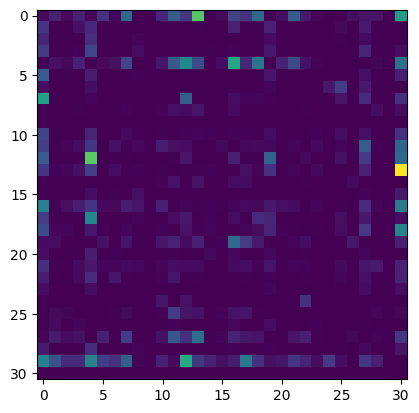

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

(-0.5, 30.5, 30.5, -0.5)

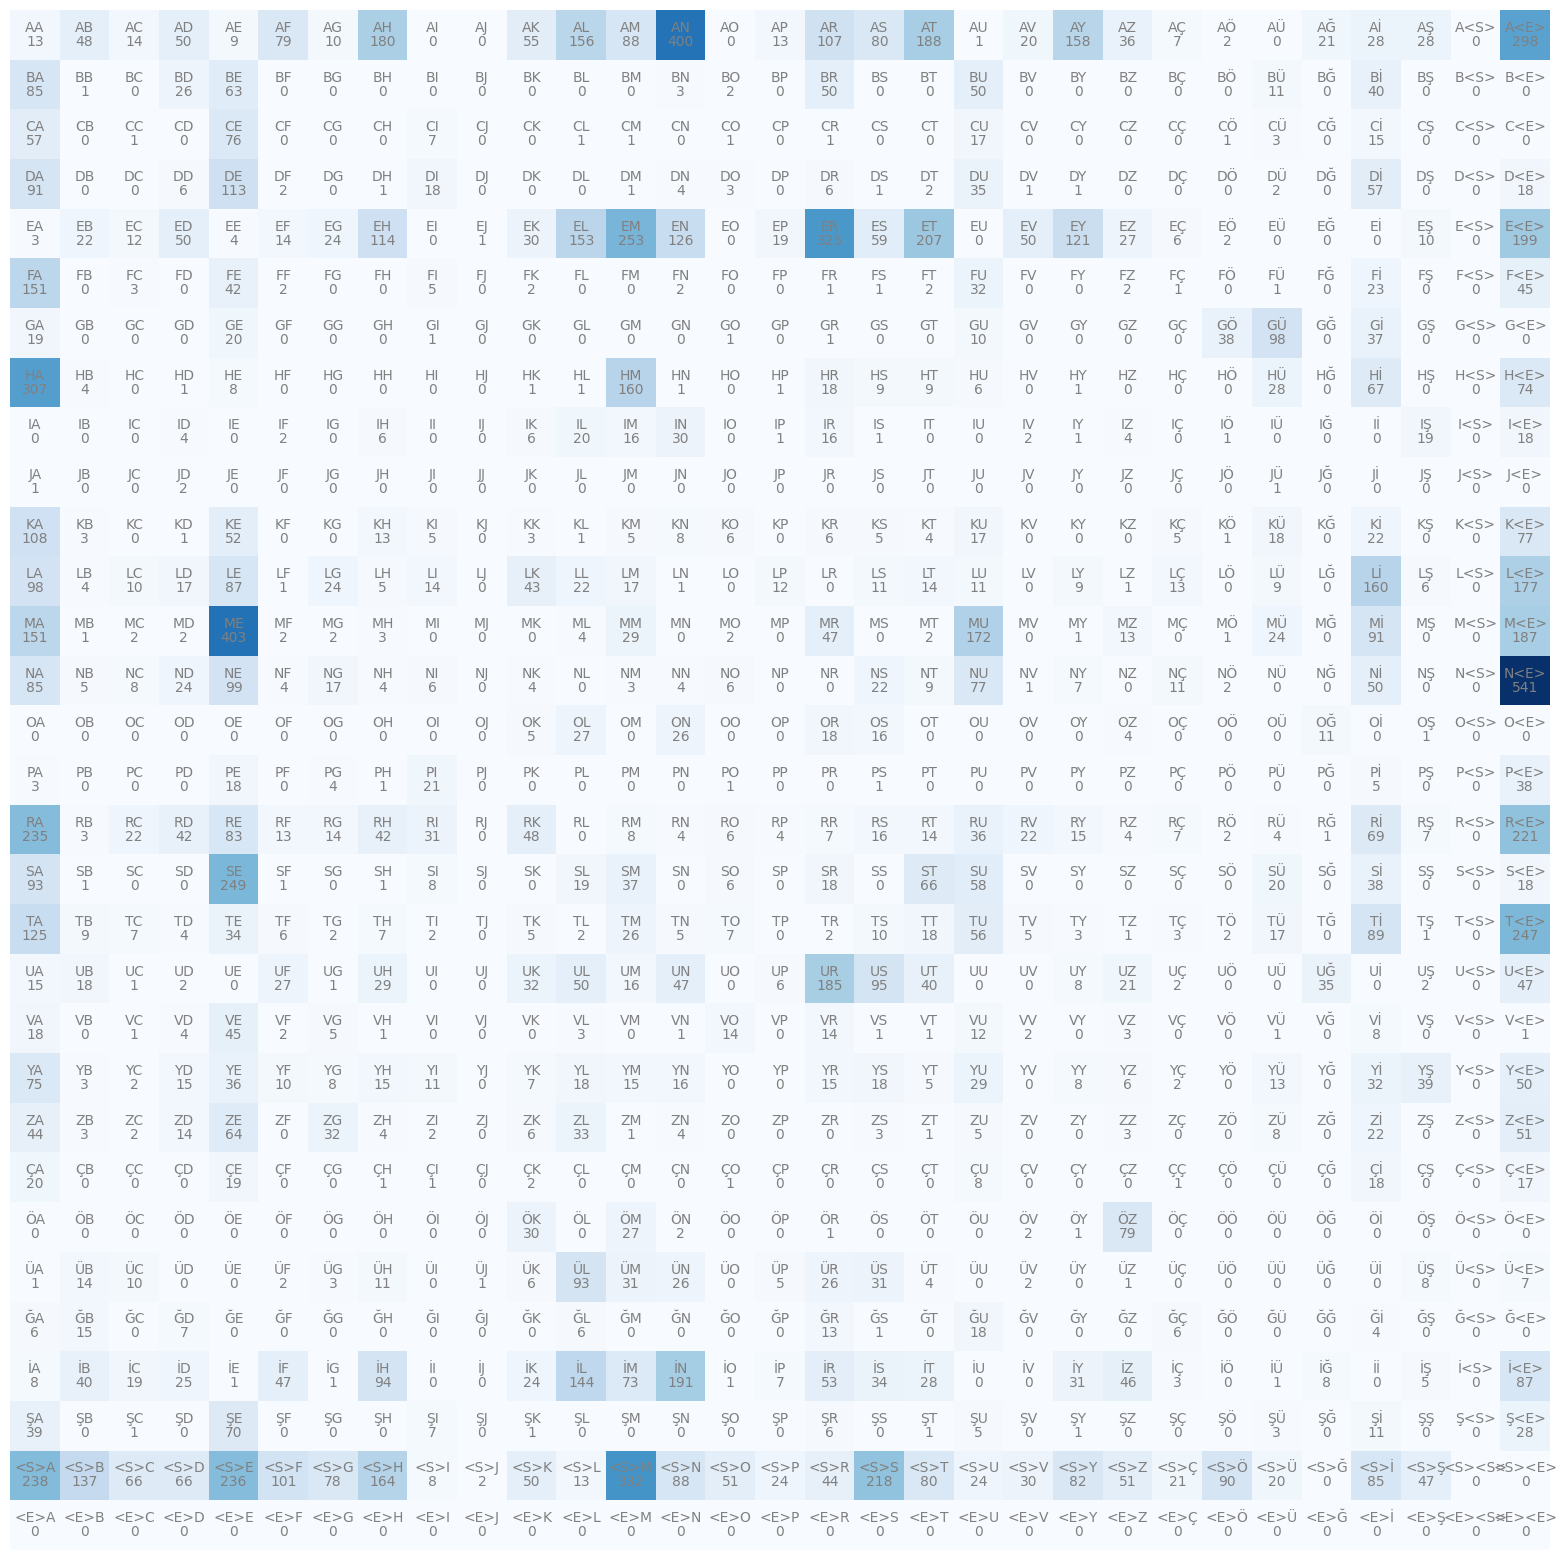

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(31):
    for j in range(31):
        chstr=itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

# We have 0 rows columns cause of our tokens. We will change tokens to a simple '.' for better vectorization.

In [19]:
N=torch.zeros((30,30), dtype=torch.int32)

In [20]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i: s for s,i in stoi.items()}

In [21]:
for w in words:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1

(-0.5, 29.5, 29.5, -0.5)

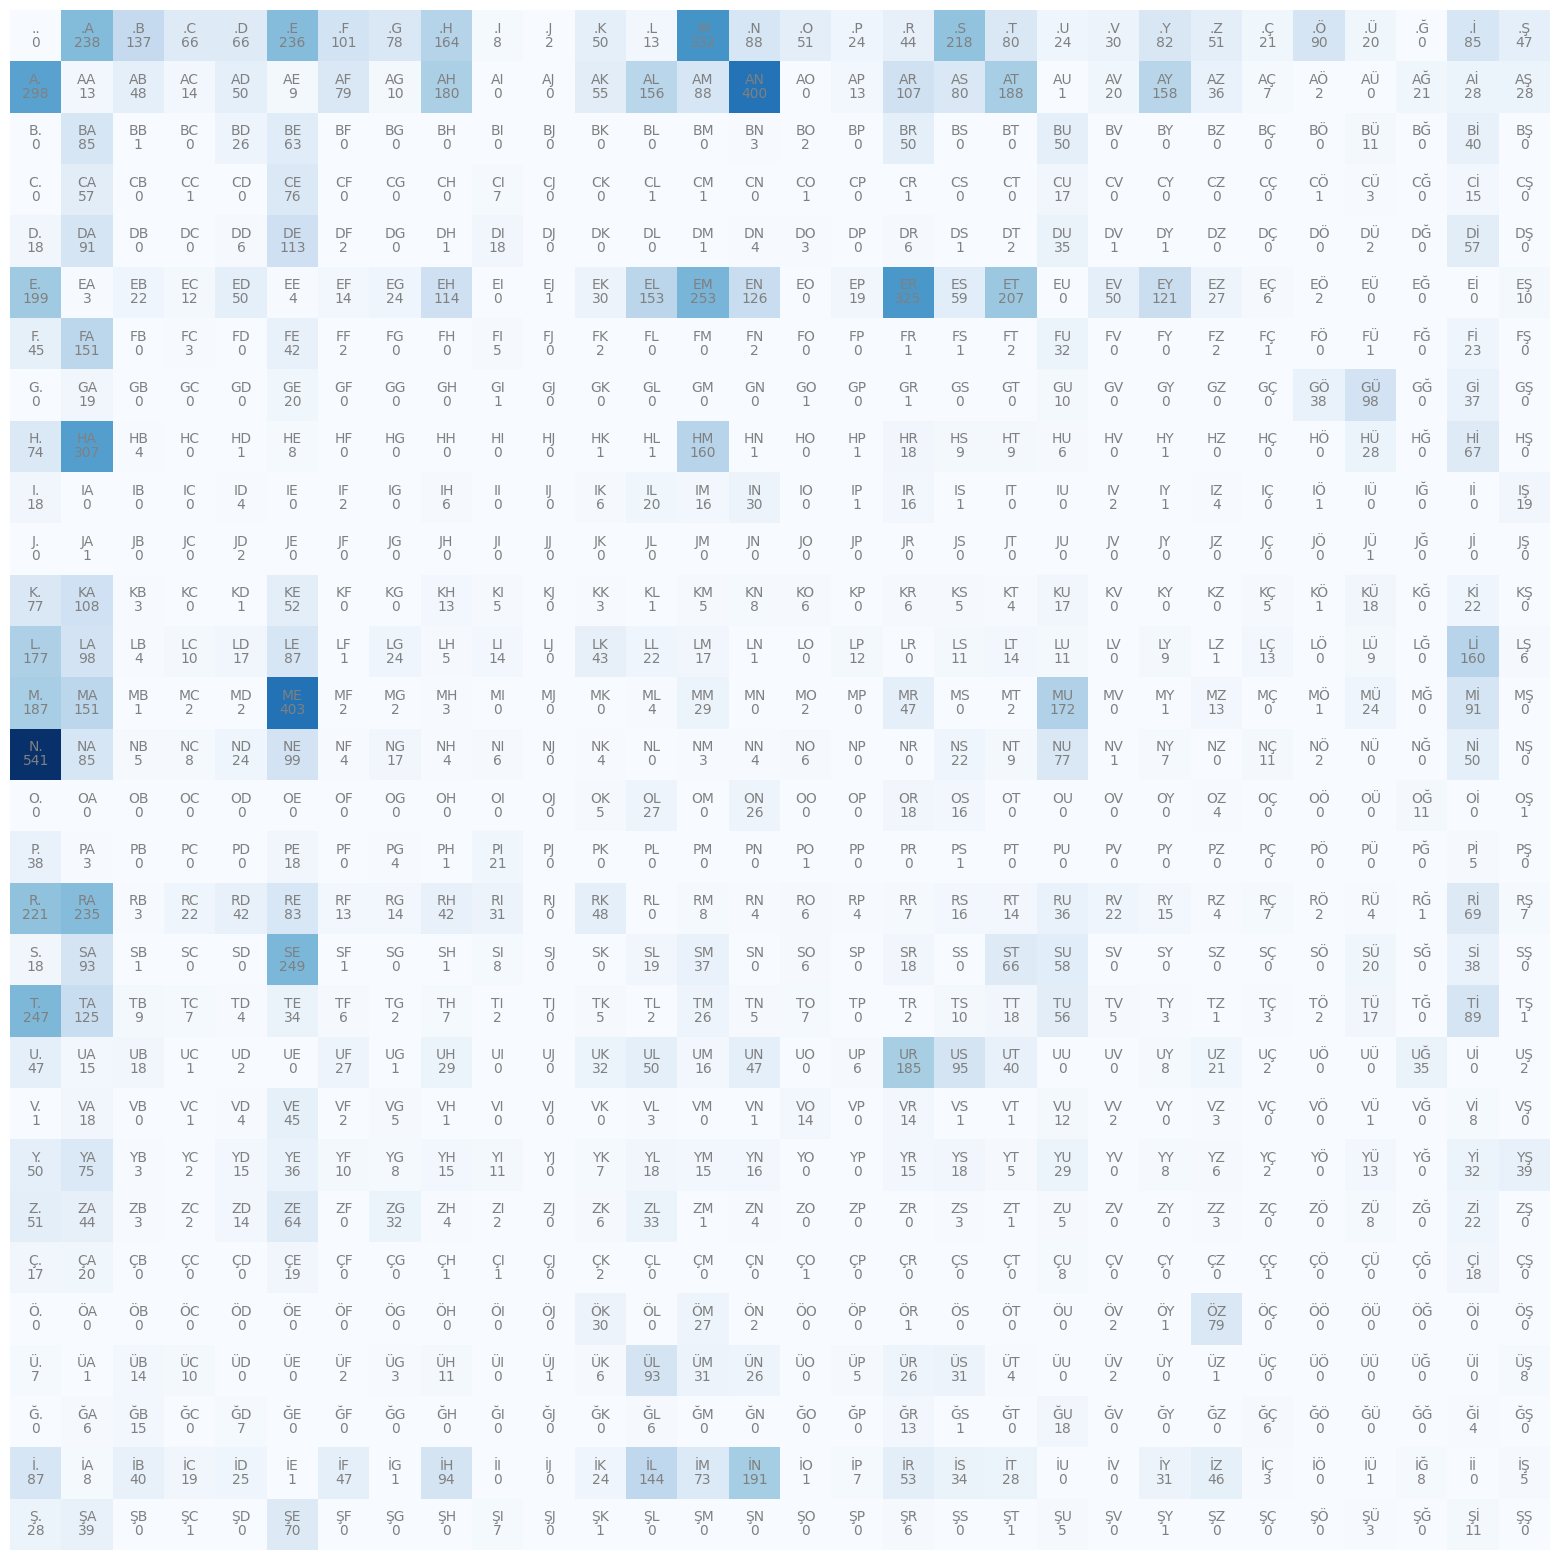

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(30):
    for j in range(30):
        chstr=itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [23]:
N[0]

tensor([  0, 238, 137,  66,  66, 236, 101,  78, 164,   8,   2,  50,  13, 332,
         88,  51,  24,  44, 218,  80,  24,  30,  82,  51,  21,  90,  20,   0,
         85,  47], dtype=torch.int32)

### Creating Probability Vector

In [24]:
p= N[0].float()
p= p/p.sum()
p

tensor([0.0000, 0.0973, 0.0560, 0.0270, 0.0270, 0.0965, 0.0413, 0.0319, 0.0670,
        0.0033, 0.0008, 0.0204, 0.0053, 0.1357, 0.0360, 0.0209, 0.0098, 0.0180,
        0.0891, 0.0327, 0.0098, 0.0123, 0.0335, 0.0209, 0.0086, 0.0368, 0.0082,
        0.0000, 0.0348, 0.0192])

In [25]:
p.sum()

tensor(1.)

In [26]:
g=torch.Generator().manual_seed(2024)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix

13

In [27]:
itos[ix]

'M'

In [28]:
g=torch.Generator().manual_seed(2024)
ix=0
while True:
    p=N[ix].float()
    p=p/p.sum()
    ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #picking sample from dist. Replacement for with replacement sampling.
    print(itos[ix])
    if ix ==0:
        break #it will break loop if it ends
        

M
U
N
.


*We sampled 'MUN'*

In [29]:
g=torch.Generator().manual_seed(2024)
for i in range(10):
    out=[]
    ix=0
    while True:
        p=N[ix].float()
        p=p/p.sum()
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #picking sample from dist. Replacement for with replacement sampling.
        out.append(itos[ix])
        if ix ==0:
            break #it will break loop if it ends
    print(''.join(out))

MUN.
MRAZL.
FANAHAN.
SESMEREN.
SEAN.
ADEGÜ.
M.
MİNÇ.
MRANÇ.
AT.


**SAMPLES ARE TERRIBLE BECAUSE BIGRAM MODELS ARE TERRIBLE** 

*But still 'ADEGÜ' and 'AT' is close to a random turkish name.*

In [30]:
P=N.float()
P/=P.sum(1, keepdim=True)

In [31]:
g=torch.Generator().manual_seed(2024)
for i in range(10):
    out=[]
    ix=0
    while True:    
        p=P[ix]
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #picking sample from dist. Replacement for with replacement sampling.
        out.append(itos[ix])
        if ix ==0:
            break #it will break loop if it ends
    print(''.join(out))

MUN.
MRAZL.
FANAHAN.
SESMEREN.
SEAN.
ADEGÜ.
M.
MİNÇ.
MRANÇ.
AT.


## Loss function

In [32]:
log_likelihood=0.0
n=0
for w in words[:3]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1, ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f} log prob: {logprob:.4f}")
print(f"{log_likelihood=}")
nll=-log_likelihood #negative log likelihood.
print(f"{nll=}")
print(f"{nll/n}") #loss function

.J: 0.0008 log prob: -7.1091
JA: 0.2500 log prob: -1.3863
AL: 0.0747 log prob: -2.5946
LE: 0.1136 log prob: -2.1753
E.: 0.1087 log prob: -2.2193
.A: 0.0973 log prob: -2.3299
AL: 0.0747 log prob: -2.5946
Lİ: 0.2089 log prob: -1.5660
İ.: 0.0896 log prob: -2.4124
.M: 0.1357 log prob: -1.9971
MA: 0.1326 log prob: -2.0206
AH: 0.0862 log prob: -2.4515
HM: 0.2299 log prob: -1.4702
MU: 0.1510 log prob: -1.8904
UT: 0.0589 log prob: -2.8317
T.: 0.3554 log prob: -1.0345
log_likelihood=tensor(-38.0835)
nll=tensor(38.0835)
2.3802196979522705


## Our goal is:
### Maximize likelihood of the data w.r.t model parameters (statistical modeling)
* Equivalent to maximizing the log likelihood (because log is monotonic)
* Equivalent to minimizing the negative log likelihood
* Equivalent to minimizing the average of the negative log likelihood

In [33]:
log_likelihood=0.0
n=0
for w in ["ARDAB"]:
#for w in words[:3]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1, ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f} log prob: {logprob:.4f}")
print(f"{log_likelihood=}")
nll=-log_likelihood #negative log likelihood.
print(f"{nll=}")
print(f"{nll/n}") #loss function

.A: 0.0973 log prob: -2.3299
AR: 0.0512 log prob: -2.9716
RD: 0.0429 log prob: -3.1499
DA: 0.2514 log prob: -1.3808
AB: 0.0230 log prob: -3.7732
B.: 0.0000 log prob: -inf
log_likelihood=tensor(-inf)
nll=tensor(inf)
inf


*Here we have inf loss. We don't want inf loss in our optimization problem. We will smooth our prob. func..*

In [34]:
P=(N+1).float()
P/=P.sum(1, keepdim=True)

In [35]:
log_likelihood=0.0
n=0
for w in ["ARDAB"]:
#for w in words[:3]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1, ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f} log prob: {logprob:.4f}")
print(f"{log_likelihood=}")
nll=-log_likelihood #negative log likelihood.
print(f"{nll=}")
print(f"{nll/n}") #loss function

.A: 0.0965 log prob: -2.3379
AR: 0.0510 log prob: -2.9766
RD: 0.0426 log prob: -3.1565
DA: 0.2347 log prob: -1.4495
AB: 0.0231 log prob: -3.7669
B.: 0.0028 log prob: -5.8889
log_likelihood=tensor(-19.5762)
nll=tensor(19.5762)
3.262706756591797


# Neural Network Approach

###### Create the training test of bigrams

In [36]:
xs, ys = [], []


for w in words[:1]:
    chs=['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [37]:
xs

tensor([ 0, 10,  1, 12,  5])

In [38]:
ys

tensor([10,  1, 12,  5,  0])

In [39]:
import torch.nn.functional as F

In [40]:
xenc=F.one_hot(xs, num_classes=30).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

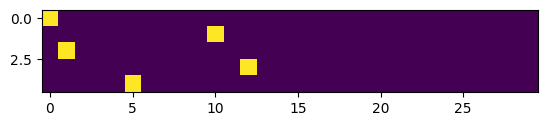

In [41]:
plt.imshow(xenc)

In [42]:
xenc.dtype

torch.float32

In [43]:
W=torch.randn((30,30))
xenc @ W  #doing matrix mult. basics 


tensor([[ 1.6642, -0.4733, -0.4980, -1.8068, -0.8732, -1.9097, -1.0269, -0.6711,
          0.8261,  0.8615,  1.6742, -0.9617,  1.7835, -0.1296,  0.5276, -0.5743,
          1.1137,  1.1983,  1.0941, -0.4882,  0.7272,  0.1020, -0.8392, -1.3465,
         -0.7463,  0.3368, -0.5961, -0.7417, -0.3720, -1.0138],
        [ 0.6262, -0.7048,  0.4668,  0.1276, -0.6777, -0.7226,  0.0186, -0.6655,
         -2.1195, -0.5275, -0.6486,  0.9399,  0.3500,  1.0976, -1.6759,  0.5107,
         -0.3292, -0.7663, -0.6247,  0.6074, -1.0133,  1.2550,  1.2684,  1.0460,
         -0.1047,  0.3223, -0.4562, -1.4813, -0.0886,  0.1328],
        [ 0.6959,  1.8008, -0.7409,  0.3534,  0.3543, -1.4601,  1.1254, -0.4127,
          4.1493, -0.1735,  0.9758, -0.0414, -1.3073,  0.9079, -0.3065,  0.0507,
         -0.4285,  1.4510, -0.9037,  0.7223, -0.1860,  0.2186,  1.0234, -0.7105,
         -1.6099, -0.3724,  0.1716, -0.0796,  1.0220, -0.0781],
        [ 0.4494,  0.7487,  1.2103, -0.4457, -0.0049,  1.5720,  0.3674, -0.9100